In [156]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import importlib
import utils_threshold
import utils_markov 

# Markov Model

In [157]:
datain = pd.read_csv("datasets/csv1.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

551

In [500]:
importlib.reload(utils_threshold)
importlib.reload(utils_markov)

thresholds = np.array([10, 12.5, 15.0, 17.5, 30, 8])
order = 1
observed_states, _ = utils_threshold.discretize_thresholds(datalist, thresholds)
markov, states_dict = utils_threshold.avg_markov_from_data(1, datalist, thresholds, noise_mean=0, noise_variance=1)

markov[np.isnan(markov)] = 0.
markov

array([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.35714286, 0.42857143, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.11111111, 0.5       , 0.38888889, 0.        ,
        0.        , 0.        ],
       [0.        , 0.015625  , 0.1484375 , 0.65625   , 0.1640625 ,
        0.015625  , 0.        ],
       [0.        , 0.        , 0.00729927, 0.16058394, 0.58394161,
        0.24817518, 0.        ],
       [0.        , 0.        , 0.        , 0.00465116, 0.16744186,
        0.82790698, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

# Plot

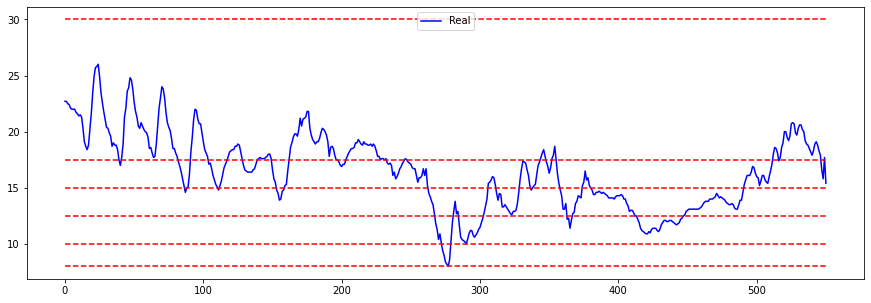

In [405]:
x_axis = np.arange(dsize)

plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")

# plot threshold lines
for thres in thresholds:
    plt.plot(x_axis, thres*np.ones(len(x_axis)), color="r", linestyle='dashed')

plt.legend(loc=9)

# Random walks on Markov Graph

show one random walk in the future + its log-probability (not pure probability to avoid underflow)

In [501]:
states_dict

{'0': (-inf, 8.0),
 '1': (8.0, 10.0),
 '2': (10.0, 12.5),
 '3': (12.5, 15.0),
 '4': (15.0, 17.5),
 '5': (17.5, 30.0),
 '6': (30.0, inf)}

In [552]:
utils_markov.random_walk_weighted(100, markov, observed_states)

{'log_prob': -76.87645098787924,
 'path': array([4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 4, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 4, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 3, 3, 4, 4, 5,
        5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4], dtype=int64)}